In [1]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [3]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in /Users/himanshupaithane/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-9-8 Python-3.9.5 torch-2.2.2 CPU

Fusing layers... 
[W NNPACK.cpp:64] Could not initialize NNPACK! Reason: Unsupported hardware.
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [4]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

In [5]:
img = 'https://ultralytics.com/images/zidane.jpg'

In [6]:
results = model(img)
results.print()

image 1/1: 720x1280 2 persons, 1 tie, 1 cell phone
Speed: 581.6ms pre-process, 291.1ms inference, 14.6ms NMS per image at shape (1, 3, 384, 640)


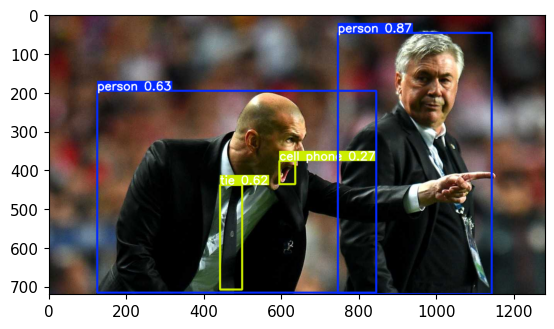

In [7]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [8]:
img2 = 'https://static01.nyt.com/images/2010/10/10/us/10google2/10google2-jumbo.jpg?quality=75&auto=webp&disable=upscale.jpg'

In [9]:
results2 = model(img2)
results2.print()

image 1/1: 681x1024 1 person, 13 cars, 5 trucks
Speed: 112.8ms pre-process, 296.7ms inference, 0.8ms NMS per image at shape (1, 3, 448, 640)


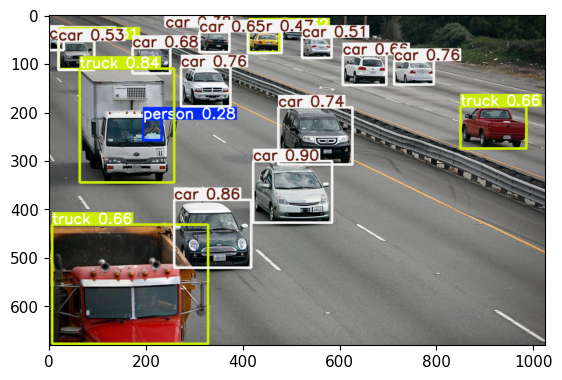

In [10]:
%matplotlib inline 
plt.imshow(np.squeeze(results2.render()))
plt.show()

In [25]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

2024-09-22 13:16:06.992 python[14405:878486] +[IMKClient subclass]: chose IMKClient_Legacy
2024-09-22 13:16:06.992 python[14405:878486] +[IMKInputSession subclass]: chose IMKInputSession_Legacy


In [2]:
import uuid   # Unique identifier
import os
import time

In [12]:
IMAGES_PATH = os.path.join('yolo_drowsiness', 'images') #/data/images

# Create the directory if it doesn't exist
os.makedirs(IMAGES_PATH, exist_ok=True)

labels = ['awake', 'drowsy']
number_imgs = 20

In [22]:
cap = cv2.VideoCapture(0)
# Loop through labels
for label in labels:
    print('Collecting images for {}'.format(label))
    time.sleep(5)
    
    # Loop through image range
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        
        # Webcam feed
        ret, frame = cap.read()
        
        # Naming out image path
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        
        # Writes out image to file 
        cv2.imwrite(imgname, frame)
        
        # Render to the screen
        cv2.imshow('Image Collection', frame)
        
        # 2 second delay between captures
        time.sleep(2)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

In [13]:
for label in labels:
    print('collecting images for{}'.format(label))
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        print(imgname)

collecting images forawake
yolo_drowsiness/images/awake.eb87ca2e-7906-11ef-a27a-2ef5e2e68642.jpg
yolo_drowsiness/images/awake.eb87cd44-7906-11ef-a27a-2ef5e2e68642.jpg
yolo_drowsiness/images/awake.eb87cee8-7906-11ef-a27a-2ef5e2e68642.jpg
yolo_drowsiness/images/awake.eb87d064-7906-11ef-a27a-2ef5e2e68642.jpg
yolo_drowsiness/images/awake.eb87d1e0-7906-11ef-a27a-2ef5e2e68642.jpg
yolo_drowsiness/images/awake.eb87d38e-7906-11ef-a27a-2ef5e2e68642.jpg
yolo_drowsiness/images/awake.eb87d50a-7906-11ef-a27a-2ef5e2e68642.jpg
yolo_drowsiness/images/awake.eb87d712-7906-11ef-a27a-2ef5e2e68642.jpg
yolo_drowsiness/images/awake.eb87d94c-7906-11ef-a27a-2ef5e2e68642.jpg
yolo_drowsiness/images/awake.eb87db86-7906-11ef-a27a-2ef5e2e68642.jpg
yolo_drowsiness/images/awake.eb87ddc0-7906-11ef-a27a-2ef5e2e68642.jpg
yolo_drowsiness/images/awake.eb87dff0-7906-11ef-a27a-2ef5e2e68642.jpg
yolo_drowsiness/images/awake.eb87e22a-7906-11ef-a27a-2ef5e2e68642.jpg
yolo_drowsiness/images/awake.eb87e45a-7906-11ef-a27a-2ef5e2e686

In [27]:
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 500 --data dataset.yaml --weights yolov5s.pt --workers 2


Traceback (most recent call last):
  File "/Users/himanshupaithane/yolov5/train.py", line 34, in <module>
    import torch
ModuleNotFoundError: No module named 'torch'


In [28]:
import torch
print(torch.__version__)


2.2.2


In [25]:
!which python


/Users/himanshupaithane/opt/miniconda3/bin/python


In [24]:
!git clone https://github.com/ultralytics/yolov5


fatal: destination path 'yolov5' already exists and is not an empty directory.


In [3]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp/weights/last.pt', force_reload=True)


Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /Users/himanshupaithane/.cache/torch/hub/master.zip
YOLOv5 🚀 2024-9-23 Python-3.9.5 torch-2.2.2 CPU

Fusing layers... 
[W NNPACK.cpp:64] Could not initialize NNPACK! Reason: Unsupported hardware.
Model summary: 157 layers, 7055974 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


In [9]:
img = os.path.join('yolo_drowsiness', 'images', 'drowsy.b4c58270-78ec-11ef-8d7e-2ef5e2e68642.jpg')


In [10]:
results = model(img)


In [11]:
results.print()


image 1/1: 720x1280 1 drowsy
Speed: 74.7ms pre-process, 282.8ms inference, 39.6ms NMS per image at shape (1, 3, 384, 640)


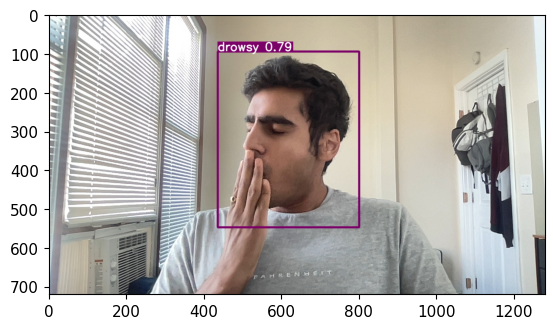

In [12]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [13]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

2024-09-23 13:40:18.246 python[22278:1363506] +[IMKClient subclass]: chose IMKClient_Legacy
2024-09-23 13:40:18.247 python[22278:1363506] +[IMKInputSession subclass]: chose IMKInputSession_Legacy
